# Project 7 -- Zeru Zhou

**TA Help:** NA

    
**Collaboration:** NA
    
- Get help from Dr. Ward's videos

## Question 1

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
csv_files = Path('/depot/datamine/data/disney').glob('*.csv')

In [3]:
data = pd.DataFrame()
for csv in csv_files:
    if csv.name == 'metadata.csv' or csv.name == 'entities.csv':
        continue
    df = pd.read_csv(csv)
    df['ride_name'] = csv.name.split('.')[0]
    data = pd.concat([data,df])

In [15]:
data.head()

,date,datetime,SACTMIN,SPOSTMIN,ride_name,code,name,short_name,land,opened_on,duration,average_wait_per_hundred
0,01/01/2015,2015-01-01 08:27:58,NaN,-999.0,pirates_of_caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2015,2015-01-01 08:56:55,NaN,-999.0,pirates_of_caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2015,2015-01-01 08:57:38,NaN,-999.0,pirates_of_caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2015,2015-01-01 08:58:34,NaN,-999.0,pirates_of_caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2015,2015-01-01 09:24:55,NaN,-999.0,pirates_of_caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data.drop(columns = ['date'])
data.head()

,datetime,SACTMIN,SPOSTMIN,ride_name
0,2015-01-01 08:27:58,NaN,-999.0,pirates_of_caribbean
1,2015-01-01 08:56:55,NaN,-999.0,pirates_of_caribbean
2,2015-01-01 08:57:38,NaN,-999.0,pirates_of_caribbean
3,2015-01-01 08:58:34,NaN,-999.0,pirates_of_caribbean
4,2015-01-01 09:24:55,NaN,-999.0,pirates_of_caribbean


In [5]:
data['status'] = 'open'

In [6]:
data.loc[data['SPOSTMIN'] == -999, "status"] = "closed"

In [7]:
data.loc[data['SPOSTMIN'] == -999, "SPOSTMIN"] = np.nan

In [8]:
data.head()

,datetime,SACTMIN,SPOSTMIN,ride_name,status
0,2015-01-01 08:27:58,NaN,NaN,pirates_of_caribbean,closed
1,2015-01-01 08:56:55,NaN,NaN,pirates_of_caribbean,closed
2,2015-01-01 08:57:38,NaN,NaN,pirates_of_caribbean,closed
3,2015-01-01 08:58:34,NaN,NaN,pirates_of_caribbean,closed
4,2015-01-01 09:24:55,NaN,NaN,pirates_of_caribbean,closed


In [9]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [10]:
data['ride_name'] = data['ride_name'].astype("category")
data['status'] = data['status'].astype("category")

In [40]:
print(data.dtypes)

datetime     datetime64[ns]
SACTMIN             float64
SPOSTMIN            float64
ride_name          category
status             category
dtype: object


In [11]:
data.reset_index(drop = True, inplace = True)

In [12]:
data.tail()

,datetime,SACTMIN,SPOSTMIN,ride_name,status
3443440,2021-12-28 20:32:16,NaN,75.0,slinky_dog,open
3443441,2021-12-28 20:40:57,NaN,75.0,slinky_dog,open
3443442,2021-12-28 20:46:27,NaN,70.0,slinky_dog,open
3443443,2021-12-28 20:48:31,NaN,65.0,slinky_dog,open
3443444,2021-12-28 21:00:21,NaN,65.0,slinky_dog,open


As code above, data is prepared.

## Question 2

In [43]:
data.groupby("ride_name").mean().sort_values('SACTMIN', ascending = False)

,SACTMIN,SPOSTMIN
ride_name,,
flight_of_passage,72.917854,114.806860
slinky_dog,40.657119,72.703003
toy_story_mania,35.066966,54.264905
rock_n_rollercoaster,29.267599,58.994605
navi_river,29.046130,62.511237
splash_mountain,25.430836,43.731363
soarin,24.963390,45.654540
7_dwarfs_train,23.991880,76.962455
kilimanjaro_safaris,22.216697,39.959134


As above, mean is calculated and sorted.

## Question 3

<AxesSubplot:xlabel='ride_name'>

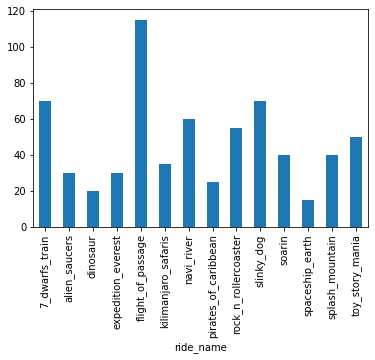

In [45]:
dat = data.groupby("ride_name")['SPOSTMIN'].median()
dat.plot.bar()

In [13]:
import plotly.express as px

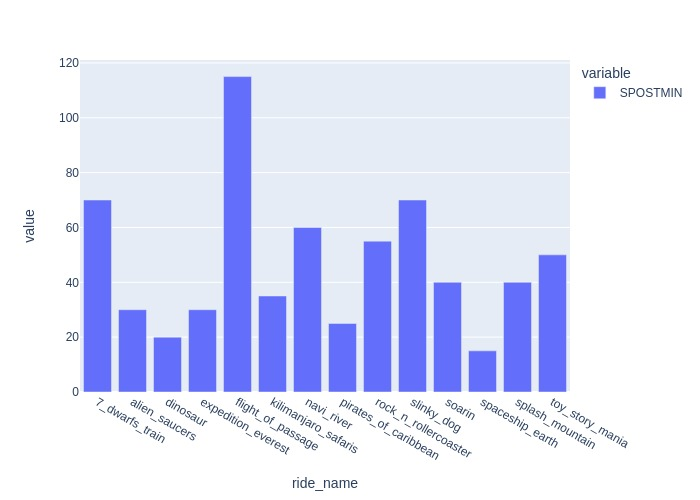

In [48]:
fig = px.bar(data.groupby("ride_name")['SPOSTMIN'].median())
fig.show(renderer = 'jpg')

As above, two bar plot are created.

## Question 4

In [14]:
def min_to_hr(minute):
    return minute/60.0

In [15]:
data.groupby('ride_name').median().apply(min_to_hr).query("SPOSTMIN >= 1")

,SACTMIN,SPOSTMIN
ride_name,,
7_dwarfs_train,0.516667,1.166667
flight_of_passage,0.883333,1.916667
navi_river,0.400000,1.000000
slinky_dog,0.616667,1.166667


Apply and query commands are used.

## Question 5

In [18]:
data.assign(mean_wait_time_act = lambda x: x.groupby('ride_name')['SACTMIN'].transform('mean') )

,datetime,SACTMIN,SPOSTMIN,ride_name,status,mean_wait_time_act
0,2015-01-01 08:27:58,NaN,NaN,pirates_of_caribbean,closed,18.167141
1,2015-01-01 08:56:55,NaN,NaN,pirates_of_caribbean,closed,18.167141
2,2015-01-01 08:57:38,NaN,NaN,pirates_of_caribbean,closed,18.167141
3,2015-01-01 08:58:34,NaN,NaN,pirates_of_caribbean,closed,18.167141
4,2015-01-01 09:24:55,NaN,NaN,pirates_of_caribbean,closed,18.167141
...,...,...,...,...,...,...
3443440,2021-12-28 20:32:16,NaN,75.0,slinky_dog,open,40.657119
3443441,2021-12-28 20:40:57,NaN,75.0,slinky_dog,open,40.657119
3443442,2021-12-28 20:46:27,NaN,70.0,slinky_dog,open,40.657119
3443443,2021-12-28 20:48:31,NaN,65.0,slinky_dog,open,40.657119


In [20]:
data.assign(mean_wait_time_post = lambda x: x.groupby('ride_name')['SPOSTMIN'].transform('mean'))

,datetime,SACTMIN,SPOSTMIN,ride_name,status,mean_wait_time_post
0,2015-01-01 08:27:58,NaN,NaN,pirates_of_caribbean,closed,28.524095
1,2015-01-01 08:56:55,NaN,NaN,pirates_of_caribbean,closed,28.524095
2,2015-01-01 08:57:38,NaN,NaN,pirates_of_caribbean,closed,28.524095
3,2015-01-01 08:58:34,NaN,NaN,pirates_of_caribbean,closed,28.524095
4,2015-01-01 09:24:55,NaN,NaN,pirates_of_caribbean,closed,28.524095
...,...,...,...,...,...,...
3443440,2021-12-28 20:32:16,NaN,75.0,slinky_dog,open,72.703003
3443441,2021-12-28 20:40:57,NaN,75.0,slinky_dog,open,72.703003
3443442,2021-12-28 20:46:27,NaN,70.0,slinky_dog,open,72.703003
3443443,2021-12-28 20:48:31,NaN,65.0,slinky_dog,open,72.703003


In [21]:
data.assign(median_wait_time_act = lambda x: x.groupby('ride_name')['SACTMIN'].transform('median'))

,datetime,SACTMIN,SPOSTMIN,ride_name,status,median_wait_time_act
0,2015-01-01 08:27:58,NaN,NaN,pirates_of_caribbean,closed,16.0
1,2015-01-01 08:56:55,NaN,NaN,pirates_of_caribbean,closed,16.0
2,2015-01-01 08:57:38,NaN,NaN,pirates_of_caribbean,closed,16.0
3,2015-01-01 08:58:34,NaN,NaN,pirates_of_caribbean,closed,16.0
4,2015-01-01 09:24:55,NaN,NaN,pirates_of_caribbean,closed,16.0
...,...,...,...,...,...,...
3443440,2021-12-28 20:32:16,NaN,75.0,slinky_dog,open,37.0
3443441,2021-12-28 20:40:57,NaN,75.0,slinky_dog,open,37.0
3443442,2021-12-28 20:46:27,NaN,70.0,slinky_dog,open,37.0
3443443,2021-12-28 20:48:31,NaN,65.0,slinky_dog,open,37.0


In [22]:
data.assign(median_wait_time_post = lambda x: x.groupby('ride_name')['SPOSTMIN'].transform('median'))

,datetime,SACTMIN,SPOSTMIN,ride_name,status,median_wait_time_post
0,2015-01-01 08:27:58,NaN,NaN,pirates_of_caribbean,closed,25.0
1,2015-01-01 08:56:55,NaN,NaN,pirates_of_caribbean,closed,25.0
2,2015-01-01 08:57:38,NaN,NaN,pirates_of_caribbean,closed,25.0
3,2015-01-01 08:58:34,NaN,NaN,pirates_of_caribbean,closed,25.0
4,2015-01-01 09:24:55,NaN,NaN,pirates_of_caribbean,closed,25.0
...,...,...,...,...,...,...
3443440,2021-12-28 20:32:16,NaN,75.0,slinky_dog,open,70.0
3443441,2021-12-28 20:40:57,NaN,75.0,slinky_dog,open,70.0
3443442,2021-12-28 20:46:27,NaN,70.0,slinky_dog,open,70.0
3443443,2021-12-28 20:48:31,NaN,65.0,slinky_dog,open,70.0


Four new columns are listed above.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.